In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255, x_test/255

In [3]:
model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(512, activation="relu"),        
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(10)
])

In [4]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(True)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

In [5]:
model.fit(x_train, y_train, epochs=7)

Train on 60000 samples
Epoch 1/7
60000/60000 [==============================] - 18s 295us/sample - loss: 0.2070 - accuracy: 0.9392
Epoch 2/7
60000/60000 [==============================] - 12s 204us/sample - loss: 0.0869 - accuracy: 0.9738
Epoch 3/7
60000/60000 [==============================] - 12s 201us/sample - loss: 0.0595 - accuracy: 0.9814
Epoch 4/7
60000/60000 [==============================] - 11s 190us/sample - loss: 0.0456 - accuracy: 0.9853
Epoch 5/7
60000/60000 [==============================] - 12s 202us/sample - loss: 0.0349 - accuracy: 0.9884
Epoch 6/7
60000/60000 [==============================] - 12s 197us/sample - loss: 0.0277 - accuracy: 0.9905
Epoch 7/7
60000/60000 [==============================] - 12s 196us/sample - loss: 0.0229 - accuracy: 0.9925


In [6]:
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 2s 216us/sample - loss: 0.0703 - accuracy: 0.9808
[0.07033664587466555, 0.9808]


In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

Class real:  3
Previsão para imagem de teste: 3


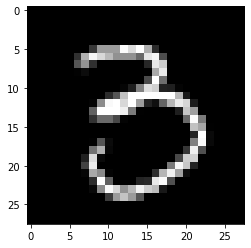

In [8]:
index = 173
img = x_test[index]

plt.imshow(img.reshape((28,28)) , cmap = 'gray')

prediction = model.predict(np.array([img]))

print ('Class real: ', y_test[index]) 
print ("Previsão para imagem de teste:", np.argmax(prediction))

[[ -8615.207      881.0996   -1039.2393     361.16653 -18554.871
    4248.936    -3122.5642   -1215.8438  -12068.571   -18114.549  ]]
Previsão para imagem de teste: 5


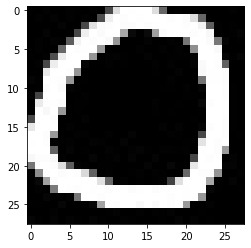

In [9]:
img = np.invert(Image.open("test.jpeg").convert('L'))

plt.imshow(img.reshape((28,28)), cmap = 'gray')
prediction = model.predict(np.array([img]))
print(prediction)
print ("Previsão para imagem de teste:", np.argmax(prediction))

In [10]:
keras_file = 'mnist_model.h5'
tf.keras.models.save_model(model, keras_file)

In [11]:
converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file(keras_file)
converter.experimental_new_converter = True
tflite_model = converter.convert()
open("linear.tflite", "wb").write(tflite_model)

1629404